# Statistical Thinking.


In [103]:
# loading modules
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#from scipy.stats import sem

#### 1. How many responders are there? Are there any missing values in any of the variables?

In [104]:
# reading csv
st = pd.read_csv('salary.csv')
st.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.3 KB


In [105]:
#missing values
missing_values = st.isnull().sum().sum()
print('Number of missing values:',missing_values)

Number of missing values: 1


In [106]:
# Looking out my NaN value
st[st.salary.isnull()]

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
208,NaN,0,21,10,0.93,1,0,3,1,4,1


#### 2. What is the lowest salary and highest salary in the group?

In [109]:
# Checking the lowest & highest salaries in the database. 
lowest = st[st.salary.notnull()].sort_values('salary')[['salary']].head(1)
highest = st[st.salary.notnull()].sort_values('salary')[['salary']].tail(1)

print('The lowest salary is: ', lowest.salary.values)
print('the highest salary is: ', highest.salary.values)

The lowest salary is  [29000.]
the highest salary is:  [96156.]


#### 3. What is the mean salary for the sample? Include the standard error of the mean.

In [110]:
# Filling my NaN value with the mean of the column
st = st.apply(lambda x: x.fillna(x.mean())) 

In [112]:
mean_salary = st.salary.mean()
st_err_m = st["salary"].sem()

print('The mean of salary is: $',mean_salary)
print('The standard error of the mean of salary is: $',st_err_m)

The mean of salary is: $ 50863.22009783626
The standard error of the mean of salary is: $ 558.9715980665014


#### 4. What is the standard deviation for the years worked?

In [113]:
std_yearsworked = st.yearsworked.std()
print('The standard deviation of years worked is: ', std_yearsworked)

The standard deviation of years worked is:  9.444695144169813


#### 5. What is the median salary for the sample?

In [114]:
median_salary = st.salary.median()
print('The median salary is: $', median_salary)

The median salary is: $ 50165.5


#### 6. What is the interquartile range for salary in the sample?

In [115]:
Q1 = st['salary'].quantile(0.25)
Q3 = st['salary'].quantile(0.75)
IQR = Q3 - Q1

print('The interquartile range for salary is: $', IQR)

The interquartile range for salary is: $ 20306.25


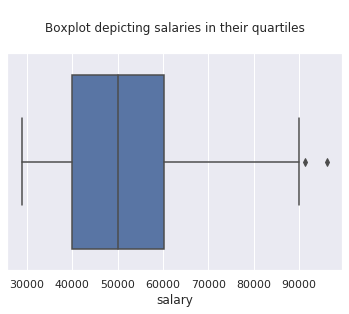

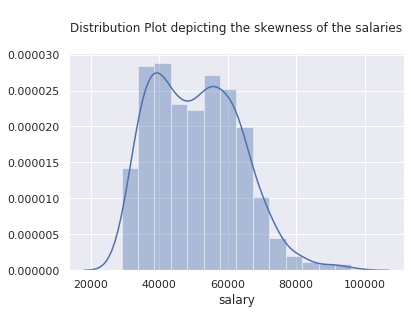

In [80]:
sns.set()
sns.boxplot(x='salary', data=st)
plt.title('\nBoxplot depicting salaries in their quartiles\n')
plt.show()

sns.distplot(st.salary)
plt.title('\nDistribution Plot depicting the skewness of the salaries\n')
plt.show()

#### 7. How many men are there in the sample? How many women are there in the sample? Present this information in a table.

In [120]:
st = st.rename(columns={'male':'gender'})
st.gender= ['male' if each == 1 else 'female' for each in st.gender]

In [121]:
gender = pd.DataFrame(st.groupby('gender').size()).reset_index()
gender = gender.rename(columns={0:"Total"})

gender

,gender,Total
0,female,128
1,male,386


#### 8. How many women are executives compared to men?

In [135]:
females = st[st.gender == 'female']
female_exec = len(females[females.position == 3])

male  = st[st.gender == 'male']
male_exec = len(male[male.position == 3])

print('Number of female executives: ', female_exec)
print('Number of male executives: ', male_exec)



Number of female executives:  19
Number of male executives:  192


#### 9. Create a histogram for the variable Salary.

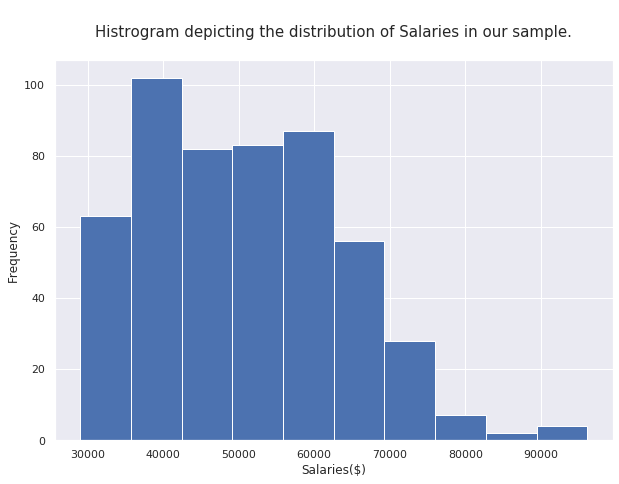

In [134]:
sns.set()
plt.figure(figsize = (10,7))
plt.hist(st['salary'])
plt.title('\nHistrogram depicting the distribution of Salaries in our sample.\n',fontsize=15)
plt.xlabel('Salaries($)')
plt.ylabel('Frequency')
plt.show()

#### 10. Examine the histogram and describe the distribution for Salary.

#### 11. Create a bar graph to show the different average salaries of men and women. (Bonus: Add error bars to the bars showing the 95% confidence interval). What does the graph tell you about the difference between men and women’s salaries?

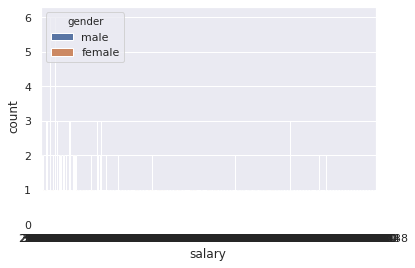

In [137]:
plt.bar(x = 'salary', hue = 'gender', data = st)
plt.show()

#### 12. Create a scatterplot with seaborn showing the relationship between Years Worked and Salary (don’t forget to insert a trend line).

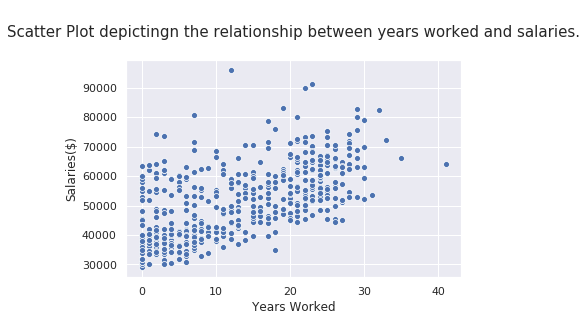

In [139]:
sns.scatterplot(x = 'yearsworked', y = 'salary', data = st)
plt.title('\nScatter Plot depictingn the relationship between years worked and salaries.\n',fontsize=15)
plt.ylabel('Salaries($)')
plt.xlabel('Years Worked')
plt.show()

#### 13. What is the relationship between Years Worked and Salary?

#### 14. Describe any patterns in the scatterplot.

#### 15. Do you notice any unusual/extreme values that do not fit the general trend? If you see any unusual values, briefly describe them (Who are they? In what way are they different?)

#### 16. Using the pearsonr function from the scipy.stats package, calculate the Pearson correlation coefficient (and its corresponding p value) to determine the nature of the relationship between Years Worked and Salary. See help(pearsonr) for help on this function.

#### 17. Interpret the size and direction of the correlation statistic.

#### 18. Is the relationship statistically significant? Report the appropriate statistic(s) to support your answer.